# Black Body Spectral Radiance

In [1]:
import numpy as np 
from rftools import blackbody
import matplotlib.pyplot as plt 
import scipy.constants as sc

# SciencePlots (optional)
plt.style.use(['science', 'notebook'])

In [2]:
# Frequency
freq = np.logspace(6, 16, 301)

In [3]:
def draw_f_band(f1, f2, label='', y=3e-7):
    """Draw frequency range on plot."""
    # Arrow
    params = dict(size=8, arrowprops=dict(arrowstyle='<->'), va='center', zorder=1)
    ax.annotate('', xy=(f1,y), xytext=(f2,y), **params)
    # Text
    params = dict(size=12, ha='center', va='bottom')
    fmid = 10**((np.log10(f1) + np.log10(f2)) / 2.)
    ax.text(fmid, y*1.5, label, **params)

In [4]:
def draw_w_band(w1, w2, label='', y=3e-7):
    """Draw wavelength band on plot."""
    f1, f2 = sc.c/w1, sc.c/w2
    draw_f_band(f1, f2, label, y)

### Plot different temperatures

/Users/johngarrett/GoogleDrive/Projects/RF-tools/rftools/thermal.py:26: RuntimeWarning: overflow encountered in exp
  term2 = np.exp(sc.h * variable / (sc.k * temp)) - 1
/Users/johngarrett/GoogleDrive/Projects/RF-tools/rftools/thermal.py:26: RuntimeWarning: overflow encountered in exp
  term2 = np.exp(sc.h * variable / (sc.k * temp)) - 1
/Users/johngarrett/GoogleDrive/Projects/RF-tools/rftools/thermal.py:26: RuntimeWarning: overflow encountered in exp
  term2 = np.exp(sc.h * variable / (sc.k * temp)) - 1
/Users/johngarrett/GoogleDrive/Projects/RF-tools/rftools/thermal.py:26: RuntimeWarning: overflow encountered in exp
  term2 = np.exp(sc.h * variable / (sc.k * temp)) - 1


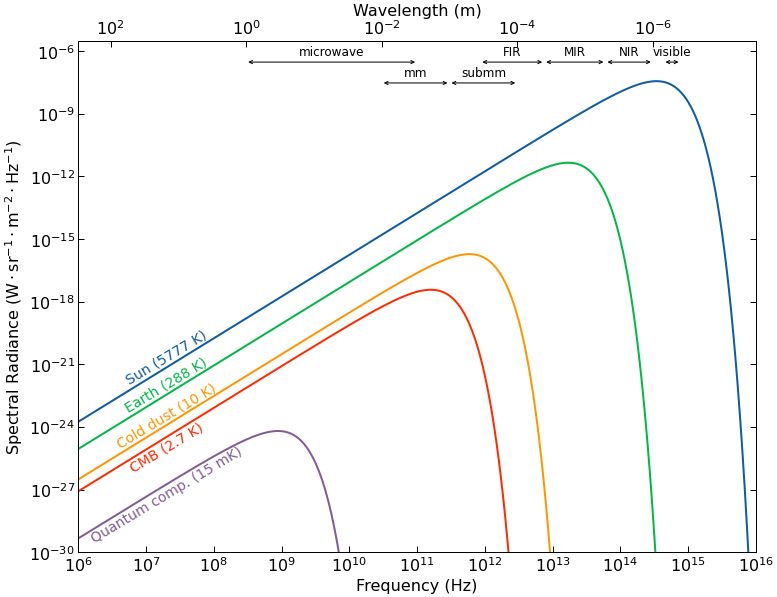

In [5]:
fig, ax = plt.subplots(figsize=(11, 8.5))
bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
ROT = np.arctan(height/width) * 180 / np.pi
ROT -= 6
ax_top = ax.twiny()

# THE SUN
temp = 5777.
l = ax.loglog(freq, blackbody(freq, temp), label='Sun (5777 K)')
l, c = l[0].get_label(), l[0].get_color()
ax.text(2e7, blackbody(2e7, temp)*3, l, rotation=ROT, ha='center', va='center', fontsize=14, color=c)

# THE EARTH
temp = 288.
l = ax.loglog(freq, blackbody(freq, temp), label='Earth (288 K)')
l, c = l[0].get_label(), l[0].get_color()
ax.text(2e7, blackbody(2e7, temp)*3, l, rotation=ROT, ha='center', va='center', fontsize=14, color=c)

# COLD DUST
temp = 10.
l = ax.loglog(freq, blackbody(freq, temp), label='Cold dust (10 K)')
l, c = l[0].get_label(), l[0].get_color()
ax.text(2e7, blackbody(2e7, temp)*3, l, rotation=ROT, ha='center', va='center', fontsize=14, color=c)

# CMB
temp = 2.7
l = ax.loglog(freq, blackbody(freq, temp), label='CMB (2.7 K)')
l, c = l[0].get_label(), l[0].get_color()
ax.text(2e7, blackbody(2e7, temp)/3, l, rotation=ROT, ha='center', va='center', fontsize=14, color=c)

# Quantum computers
temp = 0.015
l = ax.loglog(freq, blackbody(freq, temp), label='Quantum comp. (15 mK)')
l, c = l[0].get_label(), l[0].get_color()
ax.text(2e7, blackbody(2e7, temp)/3, l, rotation=ROT, ha='center', va='center', fontsize=14, color=c)

draw_f_band(300e6, 100e9, 'microwave')
draw_f_band(30e9, 300e9, 'mm', 3e-8)
draw_f_band(300e9, 3000e9, 'submm', 3e-8)
draw_w_band(40e-6, 350e-6, 'FIR')
draw_w_band(5e-6, 40e-6, 'MIR')
draw_w_band(1e-6, 5e-6, 'NIR')
draw_f_band(430e12, 770e12, 'visible')

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel(r"Spectral Radiance ($\mathrm{W}\cdot\mathrm{sr}^{−1}\cdot\mathrm{m}^{−2}\cdot\mathrm{Hz}^{−1}$)")
ax.set_ylim([1e-30, 3e-6])
ax.set_xlim([freq.min(), freq.max()])
ax.set_xticks([1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15, 1e16])

ax_top.set_xlim([sc.c/(freq.min()), sc.c/(freq.max())])
ax_top.set_xscale("log", nonposx='clip')
ax_top.set_xlabel('Wavelength (m)')
plt.tight_layout()

plt.savefig("figures/blackbody.png");